In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as plt

In [2]:
data = pd.read_csv('bre.csv')
data.head(3)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018


# Brand Analysis

### 1. Within the last two years, the brand manager wants to know the top three brands consumed in the francophone countries

In [3]:
data['territories'] = data['COUNTRIES'].map({'Ghana':'anglophone_country', 'Nigeria':'anglophone_country', 'Togo':'francophone_country',
                                             'Benin':'francophone_country', 'Senegal':'francophone_country'})

In [24]:
y_18 = data[data['YEARS'] == 2018]
y_19 = data[data['YEARS'] == 2019]
y_1819 = pd.concat([y_18, y_19], axis = 0)
franco = y_1819[y_1819['territories'] == 'francophone_country']
franco.head(3)

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS,territories
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,francophone_country
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,francophone_country
7,10108,Jones,jone.ai@yahoo.com,trophy,150,200,812,162400,40600,Togo,west,August,2018,francophone_country


In [25]:
franco.groupby(['BRANDS'])['QUANTITY'].sum().reset_index().sort_values(by = 'QUANTITY')

,BRANDS,QUANTITY
0,beta malt,44903
1,budweiser,46566
4,grand malt,47166
2,castle lite,50341
3,eagle lager,50630
5,hero,50846
6,trophy,52899


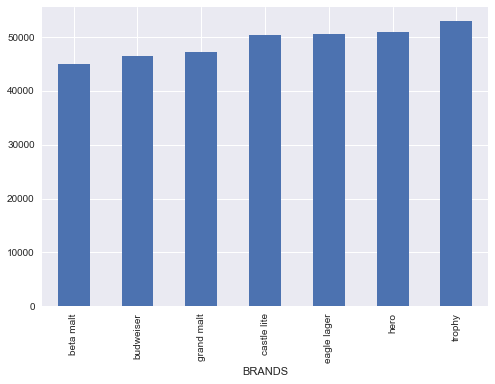

In [29]:
franco.groupby(['BRANDS'])['QUANTITY'].sum().sort_values().plot(kind = 'bar')

The top three Brands consumed in the francophone countries are Trophy, Hero and Eagle Lager

### 2. Find out the top two choice of consumer brands in Ghana

In [34]:
ghana = data[data['COUNTRIES'] == 'Ghana']
ghana.groupby(['BRANDS'])['QUANTITY'].sum().reset_index().sort_values(by = 'QUANTITY')

,BRANDS,QUANTITY
1,budweiser,24419
0,beta malt,25408
6,trophy,25524
4,grand malt,25615
5,hero,25654
2,castle lite,25806
3,eagle lager,25829


the top two choice of consumer brands in Ghana appears to be Eagle Lager and Castle Lite

### 3. Find out the details of beers consumed in the past three years in the most oil reach country in West Africa.

In [3]:
nigeria = data[data['COUNTRIES'] == 'Nigeria']
nigeria['QUANTITY'].sum()

179307

### 4. Favorites malt brand in Anglophone region between 2018 and 2019

In [37]:
anglo = y_1819[y_1819['territories'] == 'anglophone_country']
anglo.groupby(['BRANDS'])['QUANTITY'].sum().reset_index().sort_values('QUANTITY')

,BRANDS,QUANTITY
3,eagle lager,28714
2,castle lite,30526
0,beta malt,32118
1,budweiser,32988
4,grand malt,33221
6,trophy,35341
5,hero,36900


Belta malt appears to be the most favorite malt in the anglophone region

### 5 Which brands sold the highest in 2019 in Nigeria?

In [41]:
nig_2019 = nigeria[nigeria['YEARS'] == 2019]
nig_2019.groupby(['BRANDS'])['QUANTITY'].sum().reset_index().sort_values('QUANTITY')

,BRANDS,QUANTITY
2,castle lite,3388
1,budweiser,5490
6,trophy,5803
4,grand malt,8125
0,beta malt,8389
3,eagle lager,8401
5,hero,9622


Hero appears to be brands that sold the highest in 2019 in Nigeria

### 6 Favorites brand in South_South region in Nigeria

In [44]:
ss_region = nigeria[nigeria['REGION '] == 'southsouth']
ss_region.groupby(['BRANDS'])['QUANTITY'].sum().reset_index().sort_values('QUANTITY')

,BRANDS,QUANTITY
4,grand malt,3914
0,beta malt,4257
2,castle lite,4287
1,budweiser,4328
5,hero,4456
6,trophy,4468
3,eagle lager,4551


The Favorites brand in South_South region in Nigeria appears to be Eagle Lager

### 7 Beer consumption in Nigeria

In [61]:
rm_beta_malt = data.drop(data.index[data['BRANDS'] == 'beta malt'])
beer_only = rm_beta_malt.drop(rm_beta_malt.index[rm_beta_malt['BRANDS'] == 'grand malt'])
beer_only['QUANTITY'].sum()

639370

### 8. Level of consumption of Budweiser in the regions in Nigeria

In [63]:
nig_bud = nigeria[nigeria['BRANDS'] == 'budweiser']
nig_bud.groupby(['REGION '])['QUANTITY'].sum().reset_index().sort_values(by = 'QUANTITY')

,REGION,QUANTITY
0,Southeast,4113
3,northwest,4274
2,northeast,4320
4,southsouth,4328
1,northcentral,4498
5,west,4620


### 9. Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)

In [62]:
nig_bud_2019 = nig_2019[nig_2019['BRANDS'] == 'budweiser']
nig_bud_2019.groupby(['REGION '])['QUANTITY'].sum().reset_index().sort_values(by = 'QUANTITY')

,REGION,QUANTITY
3,southsouth,847
4,west,884
2,northwest,948
1,northeast,990
0,Southeast,1821


The top region consuming budweiser in Nigeria is the SouthEast